***
In this notebook i will demonstrate how you can build you custom word2vec model on your custom data
***


***
Basic word2vec functionality using the google word2vec model 
Code from :https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
***

In [1]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
for i, word in enumerate(wv.vocab):
    if i == 10:
        break
    print(word)

</s>
in
for
that
is
on
##
The
with
said


In [8]:
vec_king = wv['king']
print(vec_king)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [4]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [5]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532191514968872), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565719485282898)]


In [6]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


d:\spacy\sp\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [1]:
import json
import pandas as pd
import string
import time



***
The dataset is from Amazon Review Data (2018) https://nijianmo.github.io/amazon/index.html. I here look at Cell Phones and Accessories review dataset from "Small" subsets for experimentation
***

In [2]:
data = []

for line in open('C:\\AmazonReviewsCellPhones\\Cell_Phones_and_Accessories_5.json','r') :
    data.append(json.loads(line))

In [3]:
print(data[0])
df = pd.DataFrame(data)
print(len(data))


{'overall': 5.0, 'verified': True, 'reviewTime': '08 4, 2014', 'reviewerID': 'A24E3SXTC62LJI', 'asin': '7508492919', 'style': {'Color:': ' Bling'}, 'reviewerName': 'Claudia Valdivia', 'reviewText': 'Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.', 'summary': "Can't stop won't stop looking at it", 'unixReviewTime': 1407110400}
1128437


In [4]:
df.head(10)
df = df.drop(columns=['reviewerName', 'vote','image','style'])
df1 = df.rename(columns = {'overall': 'rating', 'asin': 'productID'}, inplace = False)



In [5]:
df1.dropna(axis = 0, how ='any',inplace=True) 
df1.drop_duplicates(subset=['rating','reviewText'],keep='first',inplace=True)

In [31]:


def clean_text(text ): 
    delete_dict = {sp_character: ' ' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower().split(' ')


In [32]:
df2 = df1.sample(n=200000)
df2['reviewText']= df2['reviewText'].apply(clean_text)

In [33]:
sentences = df2['reviewText'].tolist()

In [34]:
print(len(sentences))
print(sentences[1])
print(sentences[200])

200000
['works', 'great', 'and', 'isn', 'picky', 'other', 'charger', 'can', 'just', 'throw', 'phone', 'and', 'voila', 'just', 'you', 'know', 'when', 'charging', 'does', 'pulsate', 'semi', 'bright', 'blue', 'light', 'could', 'annoying', 'your', 'dark', 'room', 'trying', 'sleep', 'doesn', 'bother', 'though']
['the', 'first', 'time', 'used', 'the', 'casing', 'for', 'the', 'phone', 'began', 'peel', 'away', 'from', 'the', 'case', 'itself', 'poor', 'quality', 'and', 'won', 'buying', 'anything', 'from', 'this', 'maker', 'again']


In [35]:
import gensim

Code from https://stackoverflow.com/questions/52038651/loss-does-not-decrease-during-training-word2vec-gensim/52067942#52067942

In [36]:
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec

# init callback class
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        elif self.epoch % 100 == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        
        
        self.epoch += 1
        self.loss_previous_step = loss

In [37]:
# init word2vec class
w2v_model = Word2Vec(size = 300,
                     window = 15,
                     min_count = 2,
                     workers = 20,
                     sg = 1,
                     negative = 5,
                     sample = 1e-5)
# build vovab


w2v_model.build_vocab(sentences)

  
# train the w2v model
start = time.time()
w2v_model.train(sentences, 
                total_examples=w2v_model.corpus_count, 
                epochs=1001, 
                report_delay=1,
                compute_loss = True, # set compute_loss = True
                callbacks=[callback()]) # add the callback class
end = time.time()


print("elapsedtime in seconds :"+ str(end - start))
# save the word2vec model
w2v_model.save('C:\\AmazonReviewsCellPhones\\word2vec.model')

Loss after epoch 0: 2239394.0
Loss after epoch 100: 61592.0
Loss after epoch 200: 57400.0
Loss after epoch 300: 50392.0
Loss after epoch 400: 44792.0
Loss after epoch 500: 38672.0
Loss after epoch 600: 33496.0
Loss after epoch 700: 27136.0
Loss after epoch 800: 21944.0
Loss after epoch 900: 16568.0
Loss after epoch 1000: 11504.0
elapsedtime in seconds :4640.977365493774


***
Let us reload our word2vec model and perform operations using it
***

In [41]:
reloaded_w2v_model = Word2Vec.load('C:\\AmazonReviewsCellPhones\\word2vec.model')
words = list(reloaded_w2v_model.wv.vocab)
print('Vocab size: '+str(len(words)))
w1 = 'cancellation'
print("Top 3 words similar to cancellation:",\
      reloaded_w2v_model.wv.most_similar(positive = w1,topn =3))
w1 = 'poor'
print("Top 3 words similar to poor:",\
      reloaded_w2v_model.wv.most_similar(positive = w1,topn =3))
print("Similarity between earphones and headphones:"+\
      str(reloaded_w2v_model.wv.similarity(w1="earphones",w2="headphones")))
print("Similarity between charger and charge:"+\
      str(reloaded_w2v_model.wv.similarity(w1="charger",w2="charge")))

Vocab size: 29003
Top 3 words similar to cancellation: [('noise', 0.7335097789764404), ('cancelling', 0.49592477083206177), ('headset', 0.49488261342048645)]
Top 3 words similar to poor: [('bad', 0.5626211762428284), ('quality', 0.5337433815002441), ('good', 0.5034286975860596)]
Similarity between earphones and headphones:0.4875633
Similarity between charger and charge:0.892624


***
Let us use TSNE to do reduce features
Code from: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
***

In [39]:
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    #labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(reloaded_w2v_model)






***
Let us visualize our word2vec model
Code from:https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
***

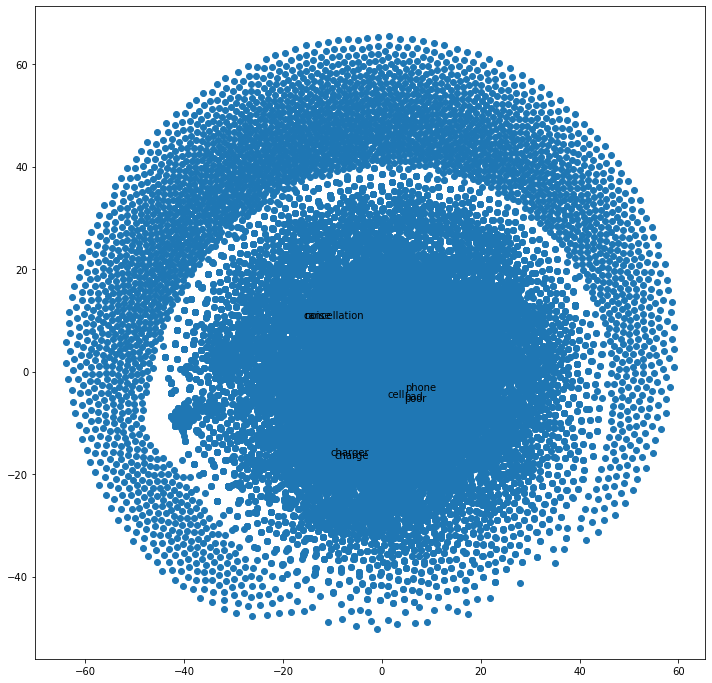

In [42]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    
    
    indices = list(range(len(labels)))
    #selected_indices = random.sample(indices, 25)
    selected_indices=[]
    index = labels.index("cell")
    selected_indices.append(index)
    index = labels.index("phone")
    selected_indices.append(index)
    index = labels.index("noise")
    selected_indices.append(index)
    index = labels.index("cancellation")
    selected_indices.append(index)
    index = labels.index("charger")
    selected_indices.append(index)
    index = labels.index("charge")
    selected_indices.append(index)
    index = labels.index("poor")
    selected_indices.append(index)
    index = labels.index("bad")
    selected_indices.append(index)
    
    
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))



plot_function = plot_with_matplotlib


plot_function(x_vals, y_vals, labels)